In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

In [3]:
# !pip install pytesseract

import os
os.chdir("D:/Projects/my-jupyter-notebook/ocr")

import mynnlib
from mynnlib import *
import sudoku
from sudoku import *

# download and install from https://github.com/tesseract-ocr/tesseract/releases/download/5.5.0/tesseract-ocr-w64-setup-5.5.0.20241111.exe
pytesseract.pytesseract.tesseract_cmd = r"C:\Program Files\Tesseract-OCR\tesseract.exe"  # Set Tesseract path if not in system PATH

# Load Sudoku image

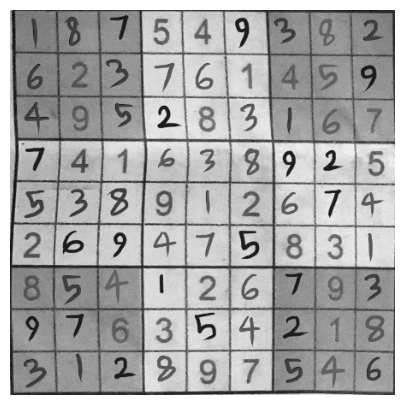

In [13]:
image = load_sudoku_image("sudoku/1.png")

In [7]:
# result = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)
# kernel = np.ones((2,2), np.uint8)
# result = cv2.morphologyEx(result, cv2.MORPH_CLOSE, kernel)

# result = cv2.adaptiveThreshold(result, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2)
# kernel = np.ones((3, 3), np.uint8)

# grid_mask = None

# for width in range(1, 3, 1):
#     for length in range(8, 50, 10):
#         h_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (length, width))
#         horizontal = cv2.morphologyEx(result, cv2.MORPH_OPEN, h_kernel, iterations=5)
#         v_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (width, length))
#         vertical = cv2.morphologyEx(result, cv2.MORPH_OPEN, v_kernel, iterations=5)
#         if grid_mask is None:
#             grid_mask = cv2.bitwise_or(horizontal, vertical)
#         else:
#             grid_mask = cv2.bitwise_or(grid_mask, cv2.bitwise_or(horizontal, vertical))

# for width in range(1, 5, 1):
#     for length in range(1, 5, 1):
#         kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (length, width))
#         removed_dots = cv2.morphologyEx(result, cv2.MORPH_OPEN, v_kernel, iterations=5)
#         grid_mask = cv2.bitwise_or(grid_mask, removed_dots)

# grid_mask_inv = cv2.bitwise_not(grid_mask)
# result = cv2.bitwise_and(result, grid_mask_inv)
# result = cv2.bitwise_not(result)

# plt.figure(figsize=(6,6))
# plt.imshow(result, cmap='gray')
# plt.axis("off")
# plt.show()

# Read grids using Tesseract

undetected = 11
incorrect = 6


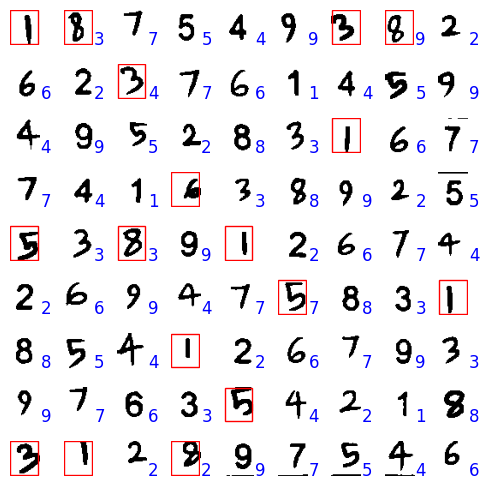

In [14]:
sudoku_numbers = read_sudoku_from_image_using_tesseract(image, [
    [1, 8, 7, 5, 4, 9, 3, 8, 2],
    [6, 2, 3, 7, 6, 1, 4, 5, 9],
    [4, 9, 5, 2, 8, 3, 1, 6, 7],
    [7, 4, 1, 6, 3, 8, 9, 2, 5],
    [5, 3, 8, 9, 1, 2, 6, 7, 4],
    [2, 6, 9, 4, 7, 5, 8, 3, 1],
    [8, 5, 4, 1, 2, 6, 7, 9, 3],
    [9, 7, 6, 3, 5, 4, 2, 1, 8],
    [3, 1, 2, 8, 9, 7, 5, 4, 6],
])

# Read grids using Resnet

## Train a model for digits

In [137]:
# for index, cell in enumerate(cells):
#     cv2.imwrite(f"sudoku/train/img_{index}.jpg", cell['img'])

In [62]:
training_params = [
    { "idx": 1, "robustness": 0.2, "break_at_val_acc_diff": 0.02},
    { "idx": 2, "robustness": 0.5, "break_at_val_acc_diff": 0.01},
    { "idx": 3, "robustness": 0.6, "break_at_val_acc_diff": 0.005},
    { "idx": 4, "robustness": 0.8, "break_at_val_acc_diff": -0.000001},
    { "idx": 5, "robustness": 1.0, "break_at_val_acc_diff": -0.000001},
    { "idx": 6, "robustness": 1.0, "break_at_val_acc_diff": -0.000001},
    { "idx": 7, "robustness": 1.5, "break_at_val_acc_diff": -0.000001},
    { "idx": 8, "robustness": 1.5, "break_at_val_acc_diff": -0.000001},
    { "idx": 9, "robustness": 2.0, "break_at_val_acc_diff": -0.000001},
    { "idx": 10, "robustness": 2.0, "break_at_val_acc_diff": -0.000001}
]
start_time = time.time()
print("Started at:", datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S"))
for param in training_params:
    print(f"Phase {param["idx"]}:")
    if param["idx"] == 1:
        model_data = init_model_for_training(f'sudoku/train', f'sudoku/train', 
                                             batch_size=64, arch="resnet34", image_size=224, robustness=param["robustness"],
                                             lr=1e-4, weight_decay=1e-4, silent=True)
    else:
        model_data = prepare_for_retraining(model_data, f'sudoku/train', f'sudoku/train', 
                                            batch_size=64, image_size=224, robustness=param["robustness"], silent=True)
    train(model_data, 10, f"sudoku/checkpoint.pth", 
          break_at_val_acc_diff=param["break_at_val_acc_diff"])
    print(f"Current time: {datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S")} | Total elapsed time: {datetime.timedelta(seconds=(time.time() - start_time))}")

Started at: 2025-03-29 11:59:41
Phase 1:
Epoch    0 /    9  | Train Loss: 1.9592 Acc: 0.3484  | Val Loss: 1.7679 Acc: 0.4774  | Elapsed time: 0:00:01.200294
Epoch    1 /    9  | Train Loss: 0.8319 Acc: 0.9419  | Val Loss: 0.9714 Acc: 0.9032  | Elapsed time: 0:00:02.471507
Epoch    2 /    9  | Train Loss: 0.3061 Acc: 1.0000  | Val Loss: 0.2900 Acc: 0.9871  | Elapsed time: 0:00:03.707989
Epoch    3 /    9  | Train Loss: 0.1215 Acc: 1.0000  | Val Loss: 0.0663 Acc: 1.0000  | Elapsed time: 0:00:04.945794
Current time: 2025-03-29 11:59:47 | Total elapsed time: 0:00:05.485174
Phase 2:
Epoch    0 /    9  | Train Loss: 1.3348 Acc: 0.6065  | Val Loss: 0.0387 Acc: 0.9935  | Elapsed time: 0:00:01.064775
Epoch    1 /    9  | Train Loss: 1.2411 Acc: 0.5355  | Val Loss: 0.0462 Acc: 0.9871  | Elapsed time: 0:00:02.392362
Current time: 2025-03-29 11:59:50 | Total elapsed time: 0:00:08.156644
Phase 3:
Epoch    0 /    9  | Train Loss: 0.8625 Acc: 0.7161  | Val Loss: 0.0383 Acc: 0.9871  | Elapsed time: 0:

sudoku/train/6/img_65.jpg predicted as 


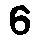

In [66]:
# test
from IPython.display import display

for digit in os.listdir("sudoku/train"):
    for file in os.listdir(f"sudoku/train/{digit}"):
        pred = resnet_image_to_digit(Image.open(f"sudoku/train/{digit}/{file}").convert("RGB"), 0.6)
        if pred != f"{digit}":
            print(f"sudoku/train/{digit}/{file} predicted as {pred}")
            display(Image.open(f"sudoku/train/{digit}/{file}"))

## Use the model on the sudoku

undetected = 1
incorrect = 0


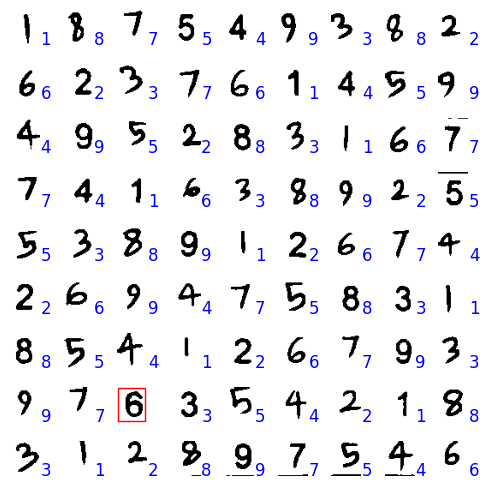

In [39]:
sudoku_numbers = read_sudoku_from_image_using_resnet(image, [
    [1, 8, 7, 5, 4, 9, 3, 8, 2],
    [6, 2, 3, 7, 6, 1, 4, 5, 9],
    [4, 9, 5, 2, 8, 3, 1, 6, 7],
    [7, 4, 1, 6, 3, 8, 9, 2, 5],
    [5, 3, 8, 9, 1, 2, 6, 7, 4],
    [2, 6, 9, 4, 7, 5, 8, 3, 1],
    [8, 5, 4, 1, 2, 6, 7, 9, 3],
    [9, 7, 6, 3, 5, 4, 2, 1, 8],
    [3, 1, 2, 8, 9, 7, 5, 4, 6],
], 0.6)

# Check sudoku validity

In [ ]:
for row in sudoku_numbers:
    print(" ".join(row))
    
# Verify Sudoku
print("\nValid Sudoku?" , is_valid_sudoku(sudoku_numbers))

1 8 7 5 4 9 3 8 2
6 2 3 7 6 1 4 5 9
4 9 5 2 8 3 1 6 7
7 4 1 6 3 8 9 2 5
5 3 8 9 1 2 6 7 4
2 6 9 4 7 5 8 3 1
8 5 4 1 2 6 7 9 3
9 7 _ 3 5 4 2 1 8
3 1 2 8 9 7 5 4 6

Valid Sudoku? False


# Hybrid (tesseract + resnet)

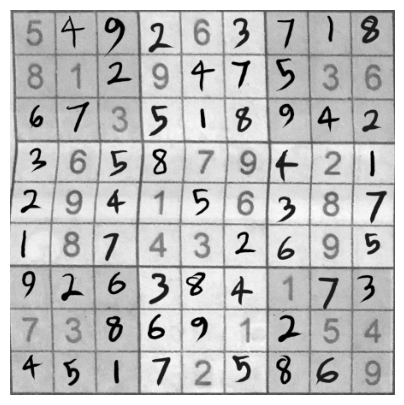

undetected = 4


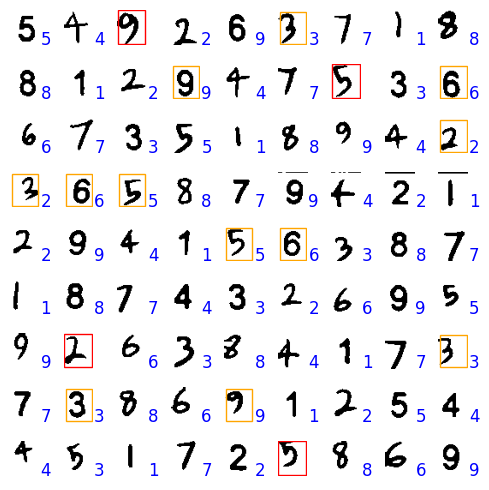

5 4 _ 2 9 3 7 1 8
8 1 2 9 4 7 _ 3 6
6 7 3 5 1 8 9 4 2
2 6 5 8 7 9 4 2 1
2 9 4 1 5 6 3 8 7
1 8 7 4 3 2 6 9 5
9 _ 6 3 8 4 1 7 3
7 3 8 6 9 1 2 5 4
4 3 1 7 2 _ 8 6 9

Valid Sudoku? False


In [102]:
image_test = load_sudoku_image("sudoku/3.jpg")
sudoku_numbers_test = read_sudoku_from_image_hybrid(image_test, None, 0.7, 1)
for row in sudoku_numbers_test:
    print(" ".join(row))
print("\nValid Sudoku?" , is_valid_sudoku(sudoku_numbers_test))